In [89]:
from texas_hold_em_utils.player import KellyMaxProportionPlayer
from texas_hold_em_utils.game import Game

In [90]:
game = Game(num_players=2)
p1 = KellyMaxProportionPlayer(0)
p2 = KellyMaxProportionPlayer(1, round_proportions=[0.5,0.5,0.5,0.5])

game.players = [p1, p2]

In [91]:
game.run_round()

In [92]:
p2.chips

1100

In [93]:
game.round

3

In [98]:
import pandas as pd

data = pd.DataFrame(columns=['final_round', 'full_kelly_stack', 'half_kelly_stack'])

for i in range(1000):
    game = Game(num_players=2)
    if i % 2 == 0:
        full = KellyMaxProportionPlayer(0)
        half = KellyMaxProportionPlayer(1, round_proportions=[0.5,0.5,0.5,0.5])
        game.players = [full, half]
    else:
        full = KellyMaxProportionPlayer(1)
        half = KellyMaxProportionPlayer(0, round_proportions=[0.5,0.5,0.5,0.5])
        game.players = [half, full]
        
    game.run_round()
    data = pd.concat([data, pd.DataFrame(data={'final_round': [game.round], 'full_kelly_stack': [full.chips], 'half_kelly_stack': [half.chips]})])
    
data

,final_round,full_kelly_stack,half_kelly_stack
0,0,1010,990
0,0,990,1010
0,0,1010,990
0,0,990,1010
0,0,1010,990
...,...,...,...
0,0,1020,980
0,0,980,1020
0,0,1020,980
0,0,1010,990


In [99]:
data['full_kelly_stack'].mean()

1003.43

In [100]:
data['half_kelly_stack'].mean()

996.57

# Optimizing 2 player games with constant proportion

In [123]:
import random
import math

data = pd.DataFrame(columns=['kelly_proportion', 'stack'])

for i in range(100000):
    game = Game(num_players=2)
    p1_prop = math.ceil(random.random() * 20) / 20.0
    p2_prop = math.ceil(random.random() * 20) / 20.0
    p1 = KellyMaxProportionPlayer(0, round_proportions=[p1_prop,p1_prop,p1_prop,p1_prop])
    p2 = KellyMaxProportionPlayer(1, round_proportions=[p2_prop,p2_prop,p2_prop,p2_prop])
    game.players = [p1, p2]
    game.run_round()
    data = pd.concat([data, pd.DataFrame(data={'kelly_proportion': [p1_prop, p2_prop], 'stack': [p1.chips, p2.chips]})])
    

C:\Users\amarl\AppData\Local\Temp\ipykernel_3056\2549534992.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame(data={'kelly_proportion': [p1_prop, p2_prop], 'stack': [p1.chips, p2.chips]})])


In [124]:
data.to_csv('data/2_player_kelly_player_optimization.csv')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

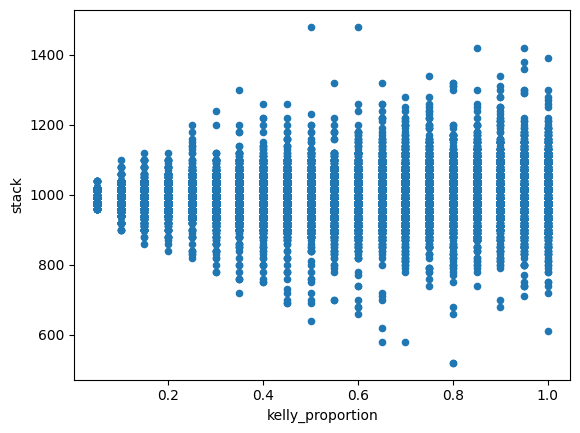

In [125]:
data.plot(x='kelly_proportion', y='stack', kind='scatter')

In [126]:
data.groupby('kelly_proportion').mean()

,stack
kelly_proportion,
0.05,994.388021
0.10,995.443793
0.15,996.268116
0.20,997.112958
0.25,997.91813
0.30,998.411215
0.35,998.839516
0.40,999.570833
0.45,999.861056


There's a pretty clear linear relationship here, as the proportion increases the expected return does... but I think this might have soemthing to do with the way the test was set up. If you're more aggressive than the opponent you're likely to make them fold even if they have a better hand. From work in game theory by smarter people than I, the common consensus is that the more uncertain you are of the accuracy of your chance of winning, the smaller your ideal bet size should be. But maybe this is an artifact of the simple heads-up game... Try multi-player games and see what happens. Also might help to separate by round